## Imports

In [4]:
from typing import final

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub


import os

from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split


# Downland Dataset

In [5]:
# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

PATH = os.path.join(path, 'Exam_Score_Prediction.csv')
print("Path to dataset files:", PATH)

Path to dataset files: /home/franio/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2/Exam_Score_Prediction.csv


# Getting Data, tiding up data

In [6]:
data = pd.read_csv(PATH)
data.drop('student_id', axis=1, inplace=True) # We do not need it
data.drop(data[data['gender'] == 'other'].index, inplace=True)

data

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...
19992,17,male,b.com,5.74,81.4,yes,7.5,good,online videos,high,hard,95.0
19993,19,female,ba,3.28,73.3,yes,9.5,good,group study,high,easy,93.9
19996,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19998,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


# Feature Engineering
Some data is qualitative, so we need to make it quantitative

## Qualitative data

In [7]:
qualitative_features_name = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
unique_qualitative_features = {}

for feature in qualitative_features_name:
    unique_qualitative_features[feature] = data[feature].unique()

unique_qualitative_features = pd.DataFrame.from_dict(unique_qualitative_features, orient='index')
unique_qualitative_features

,0,1,2,3,4,5,6
gender,male,female,None,None,None,None,None
course,diploma,b.sc,b.tech,bba,ba,b.com,bca
internet_access,yes,no,None,None,None,None,None
sleep_quality,poor,good,average,None,None,None,None
study_method,coaching,mixed,online videos,self-study,group study,None,None
facility_rating,low,high,medium,None,None,None,None
exam_difficulty,hard,moderate,easy,None,None,None,None


## Feature Engineering

In [8]:
data_copy = data.copy()

# Binary Features
data_copy['gender'] = data['gender'].map({'male': 1, 'female': 0})
data_copy['internet_access'] = data['internet_access'].map({'yes': 1, 'no': 0})

# Nominal Features
data_copy['sleep_quality'] = data['sleep_quality'].map({'poor':0, 'average':1, 'good':2})
data_copy['facility_rating'] = data['facility_rating'].map({'low':0, 'medium':1, 'high':2})
data_copy['exam_difficulty'] = data['exam_difficulty'].map({'easy':0, 'moderate':1, 'hard':2})

# Dummy variables for qualitative not nominal variables
# Course - I assume only if it is just diploma or university course
data_copy['diploma'] = [1 if d == 'diploma' else 0 for d in data['course']]
data_copy.drop('course', axis=1, inplace=True)

# Study Method
data_copy['group_study'] = [1 if d == 'group study' else 0 for d in data['study_method']]
data_copy['self_study'] = [1 if d == 'self-study' else 0 for d in data['study_method']]
data_copy['online_videos'] = [1 if d == 'online videos' else 0 for d in data['study_method']]
data_copy['coaching'] = [1 if d == 'coaching' else 0 for d in data['study_method']]
data_copy['coaching'] = [1 if d == 'coaching' else 0 for d in data['study_method']]
data_copy['mixed'] = [1 if d == 'mixed' else 0 for d in data['study_method']]
data_copy.drop('study_method', inplace=True, axis=1)



data_copy

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,diploma,group_study,self_study,online_videos,coaching,mixed
0,17,1,2.78,92.9,1,7.4,0,0,2,58.9,1,0,0,0,1,0
2,22,1,7.88,76.8,1,8.5,0,2,1,90.3,0,0,0,0,1,0
4,20,0,0.89,71.6,1,9.8,0,0,1,43.7,1,0,0,0,1,0
5,23,1,3.48,65.4,1,4.2,2,0,1,58.2,0,0,0,0,0,1
6,17,0,1.35,69.0,1,7.4,1,2,2,53.7,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,17,1,5.74,81.4,1,7.5,2,2,2,95.0,0,0,0,1,0,0
19993,19,0,3.28,73.3,1,9.5,2,2,0,93.9,0,1,0,0,0,0
19996,18,1,3.71,41.6,0,5.9,1,1,1,60.9,0,0,0,0,1,0
19998,19,1,4.60,76.3,0,6.1,2,1,1,79.0,0,0,1,0,0,0


# Data Split

In [9]:
y = data_copy['exam_score']
X = data_copy.drop('exam_score', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,diploma,group_study,self_study,online_videos,coaching,mixed
1747,20,1,5.57,43.4,0,5.4,1,2,0,0,0,1,0,0,0
2351,23,0,3.52,61.1,1,4.6,0,2,1,1,0,0,0,1,0
7551,20,0,1.83,58.6,1,9.3,1,1,1,0,1,0,0,0,0
13665,19,1,7.17,44.1,1,4.5,0,1,2,0,0,0,0,1,0
10989,23,1,5.06,86.1,1,8.7,0,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18021,20,1,0.39,58.0,1,6.0,2,0,1,0,0,0,1,0,0
7776,23,0,2.44,74.7,0,5.1,2,2,1,0,0,1,0,0,0
8106,20,0,0.90,92.3,0,9.3,2,2,2,0,1,0,0,0,0
1304,21,1,7.51,72.8,0,4.7,0,2,0,0,0,0,0,1,0


# Data Exploration and Visualisations

## Target Data

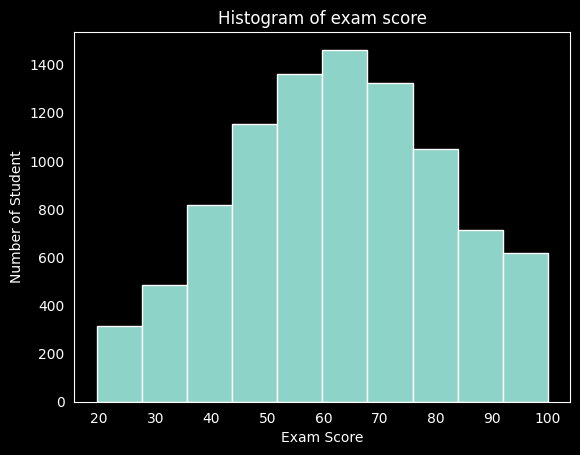

In [10]:
plt.hist(y_train)
plt.grid(False)
plt.title('Histogram of exam score')
plt.ylabel('Number of Student')
plt.xlabel('Exam Score')
plt.show()

## Correlation matrix

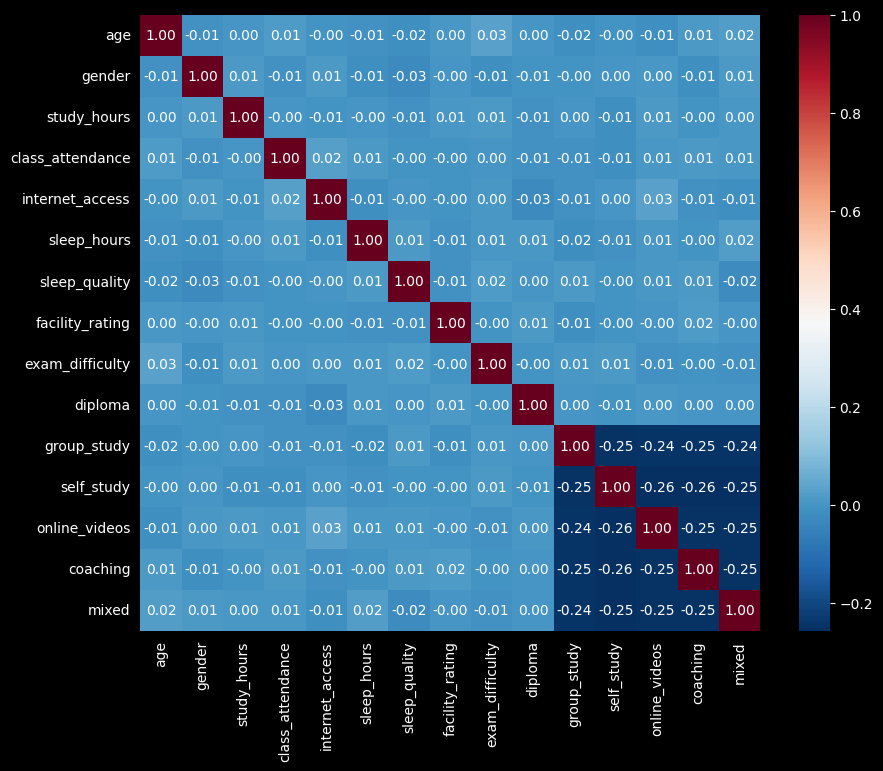

In [11]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')


plt.figure(figsize=(10, 8))
# 'annot=True' prints the values; 'fmt=".2f"' rounds to 2 decimal places
sns.heatmap(corr_mtx, annot=True, fmt=".2f", cmap="RdBu_r", xticklabels=names, yticklabels=names)
plt.show()

## Scatter Matrix

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='gender', ylabel='age'>,
        <Axes: xlabel='study_hours', ylabel='age'>,
        <Axes: xlabel='class_attendance', ylabel='age'>,
        <Axes: xlabel='internet_access', ylabel='age'>,
        <Axes: xlabel='sleep_hours', ylabel='age'>,
        <Axes: xlabel='sleep_quality', ylabel='age'>,
        <Axes: xlabel='facility_rating', ylabel='age'>,
        <Axes: xlabel='exam_difficulty', ylabel='age'>,
        <Axes: xlabel='diploma', ylabel='age'>,
        <Axes: xlabel='group_study', ylabel='age'>,
        <Axes: xlabel='self_study', ylabel='age'>,
        <Axes: xlabel='online_videos', ylabel='age'>,
        <Axes: xlabel='coaching', ylabel='age'>,
        <Axes: xlabel='mixed', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='gender'>,
        <Axes: xlabel='gender', ylabel='gender'>,
        <Axes: xlabel='study_hours', ylabel='gender'>,
        <Axes: xlabel='class_attendance', ylabel='gender'>,
        <Axes

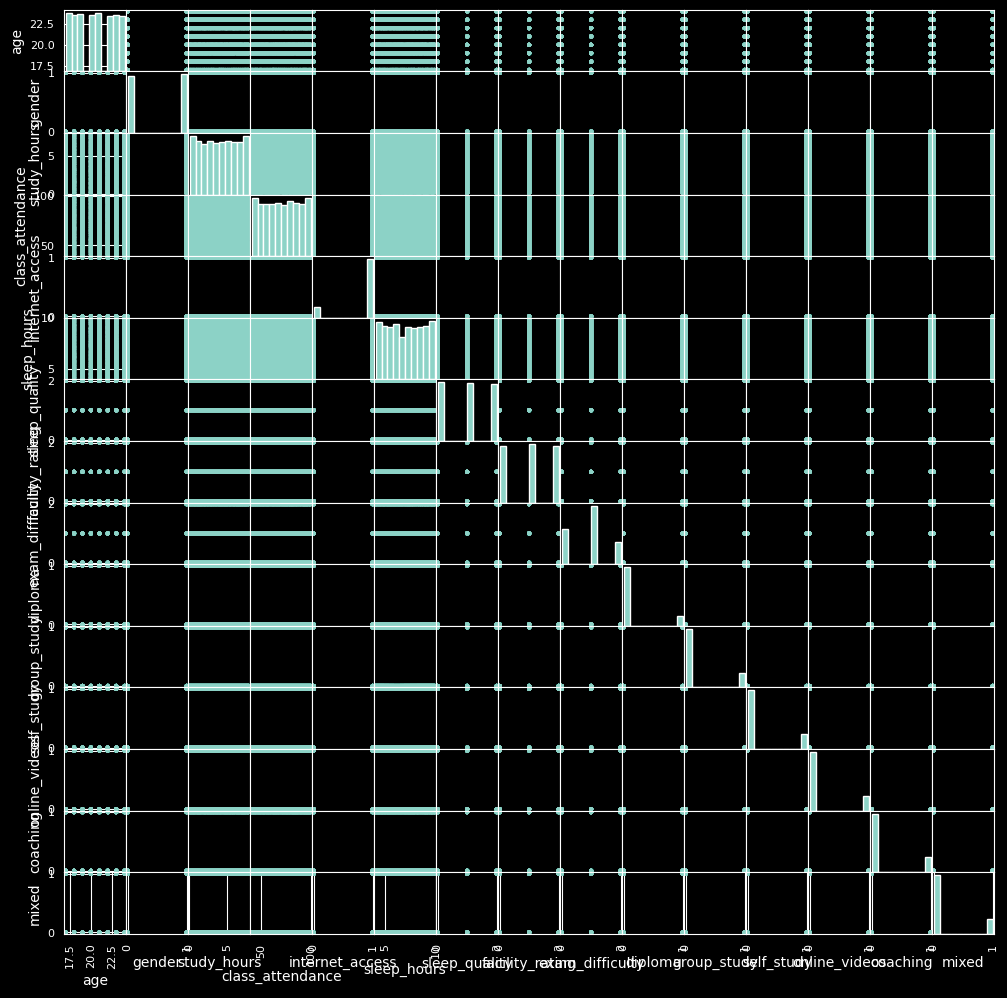

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(x_train, figsize = (12,12))

# VIF score

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_var_score = pd.DataFrame()
vif_var_score['name'] = names
vif_var_score['VIF'] = [vif(df_features.values, i) for i in range(len(names))]
vif_var_score['Variance'] = [np.var(df_features[n]) for n in names]

vif_var_score

,name,VIF,Variance
0,age,1.002237,5.250825
1,gender,1.001691,0.249972
2,study_hours,1.000714,5.329942
3,class_attendance,1.001527,299.434147
4,internet_access,1.002662,0.127677
5,sleep_hours,1.001702,3.022216
6,sleep_quality,1.002165,0.666731
7,facility_rating,1.000810,0.659341
8,exam_difficulty,1.001620,0.482480
9,diploma,1.001113,0.119489


# Feature Target Mutal Regression
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

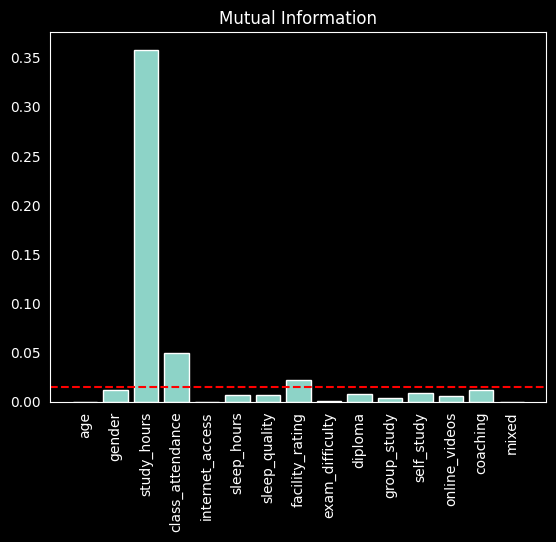

,Feature,Mutual Information
0,age,0.000000
1,gender,0.012341
2,study_hours,0.357852
3,class_attendance,0.049361
4,internet_access,0.000000
5,sleep_hours,0.007219
6,sleep_quality,0.006843
7,facility_rating,0.021603
8,exam_difficulty,0.001138
9,diploma,0.007575


In [19]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(x_train, y_train)

mi_df = pd.DataFrame({"Feature": names, "Mutual Information": mi})

plt.bar(names, mi)
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Mutual Information')
plt.axline((0, .015), (1, 0.015), color='r', linestyle='--')
plt.show()
mi_df

# Feature Redundancy

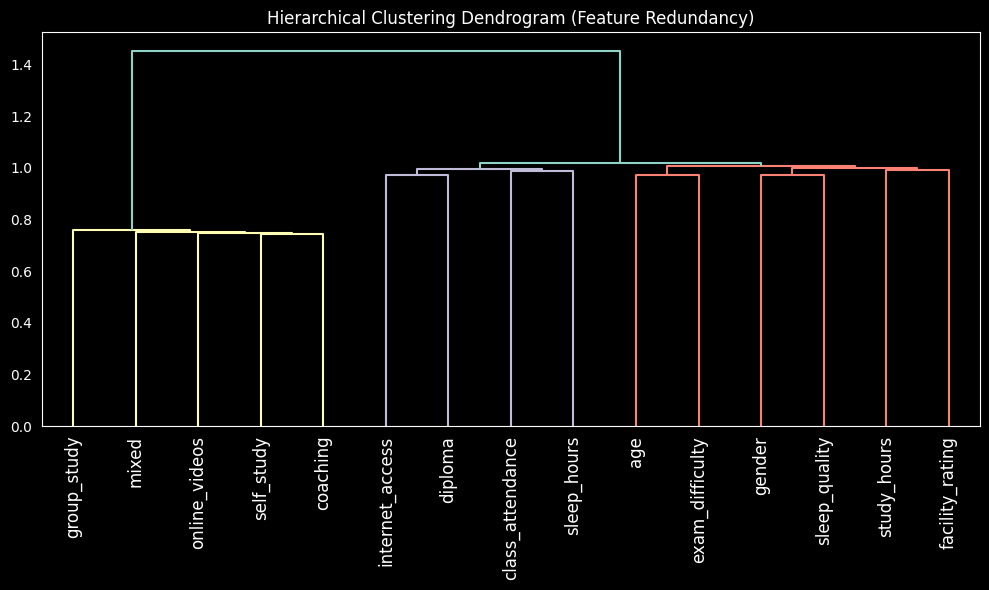

Original features: 15
Reduced features: 5
Selected: Index(['age', 'gender', 'study_hours', 'class_attendance', 'group_study'], dtype='object')


array([[ 1.00000000e+00, -1.00715244e-02, -8.84493750e-05,
         1.36699917e-02, -1.57122791e-03, -7.95461828e-03,
        -1.57663304e-02,  4.08027207e-03,  2.97111413e-02,
         1.44549681e-03, -1.56689305e-02, -2.07529627e-03,
        -1.34699379e-02,  1.27161012e-02,  1.83577250e-02],
       [-1.00715244e-02,  1.00000000e+00,  1.14035218e-02,
        -9.87955592e-03,  8.69818178e-03, -1.46151038e-02,
        -2.61404530e-02, -8.20377829e-04, -1.10361180e-02,
        -5.83378492e-03, -3.04025031e-03,  1.21034953e-03,
         4.62535708e-03, -1.34039534e-02,  1.06449623e-02],
       [-8.84493750e-05,  1.14035218e-02,  1.00000000e+00,
        -5.22798326e-04, -5.55941026e-03, -8.80670300e-04,
        -9.15189025e-03,  7.76634841e-03,  1.06775654e-02,
        -9.54116164e-03,  1.76443738e-03, -1.23661447e-02,
         8.48903592e-03, -1.53984341e-03,  3.84259714e-03],
       [ 1.36699917e-02, -9.87955592e-03, -5.22798326e-04,
         1.00000000e+00,  2.40437416e-02,  1.24438590

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict

# 1. Compute Spearman correlation and distance matrix
# Assuming X is your dataframe of explanatory variables
corr = spearmanr(x_train).correlation
# Ensure the matrix is symmetric (sometimes float errors occur)
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# Convert correlation to a distance matrix
dist_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(hierarchy.distance.squareform(dist_matrix))

# 2. Visualize the Dendrogram
fig, ax = plt.subplots(figsize=(10, 6))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=names, ax=ax, leaf_rotation=90
)
ax.set_title("Hierarchical Clustering Dendrogram (Feature Redundancy)")
plt.tight_layout()
plt.grid(False)
plt.show()

# 3. Select Features
# Threshold '1' is common for 1 - abs(corr), but you can adjust based on the plot
cluster_ids = hierarchy.fcluster(dist_linkage, t=1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

# Keep only the first feature from each cluster
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
X_reduced = X.iloc[:, selected_features]

print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {len(selected_features)}")
print(f"Selected: {names[selected_features]}")
corr

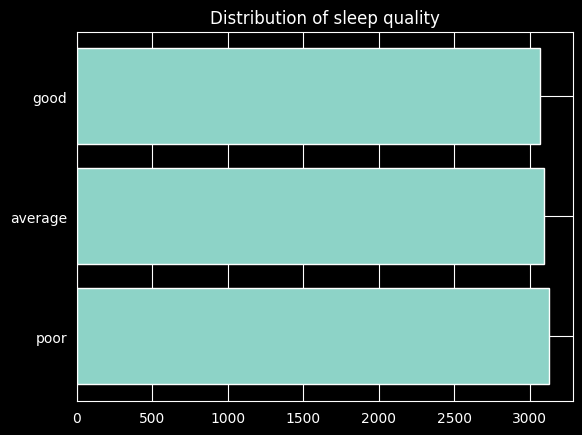

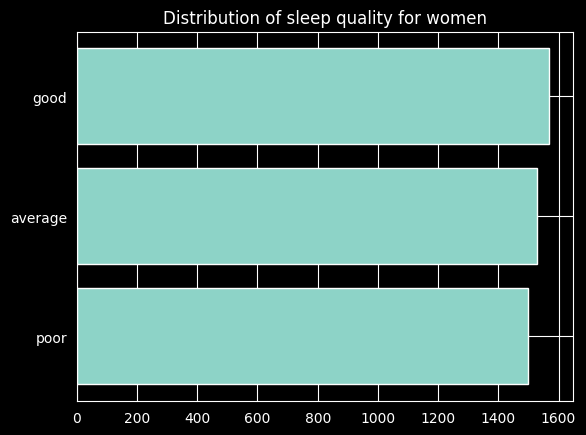

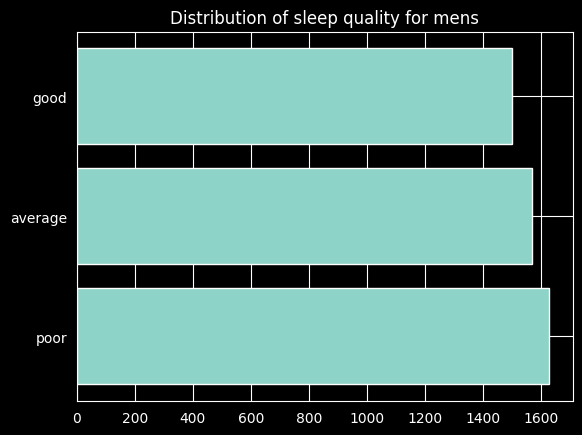

In [16]:
sleep_names = ['poor', 'average', 'good']
_, both = np.unique(x_train['sleep_quality'], return_counts=True)
plt.barh(sleep_names, both)
plt.title('Distribution of sleep quality')
plt.show()

_, female = np.unique(x_train[x_train['gender'] == 0]['sleep_quality'], return_counts=True)
plt.barh(sleep_names, female)
plt.title('Distribution of sleep quality for women')
plt.show()

_, male = np.unique(x_train[x_train['gender'] == 1]['sleep_quality'], return_counts=True)
plt.barh(sleep_names, male)
plt.title('Distribution of sleep quality for mens')
plt.show()

# Choosing Features
For final data set I will take:
- study hours (as it has got the biggest mutual information score)
- class attendance (also having relatively high mi and variance)
- facility rating (also basing on mi score)
- gender (dropping sleep quality as these features are correlated [redundant])
- coaching (all study methods are correlated this one has go the biggest MI)
- self-study (to distinguish self study coaching and group study)

In [20]:
choose_feat_and_y = ['study_hours', 'class_attendance', 'facility_rating', 'gender', 'coaching', 'self_study', 'exam_score']
final_data = data_copy[choose_feat_and_y]

final_data

,study_hours,class_attendance,facility_rating,gender,coaching,self_study,exam_score
0,2.78,92.9,0,1,1,0,58.9
2,7.88,76.8,2,1,1,0,90.3
4,0.89,71.6,0,0,1,0,43.7
5,3.48,65.4,0,1,0,0,58.2
6,1.35,69.0,2,0,0,0,53.7
...,...,...,...,...,...,...,...
19992,5.74,81.4,2,1,0,0,95.0
19993,3.28,73.3,2,0,0,0,93.9
19996,3.71,41.6,1,1,1,0,60.9
19998,4.60,76.3,1,1,0,1,79.0


# Saving a new Data

In [21]:
FILE_NAME = 'new_Exam_Score_Prediction.csv'
final_data.to_csv(FILE_NAME, index=False)
